## 2lvl or 3lvl Buck or Buckboost Power Dissapation

In [ ]:
# use modified cyntec model, which simplifies input parameter dependent variables
# added nxTON DCM calculation

#### to do:
1. verify ciss,coss and crss models vs. datasheet graphs
2. improve self heating of mosfets
3. set up jupyter server for public use
4. create gui front end
5. add features to excel export function 

In [1]:
import libs.append_path
from add_python_libraries import *
import pd_filter_fcns

from bucklosses_dcm import Buckconverter_losses

from multiparam_multivar_generic import Multiparam_multivar_df as mp_mv_df

### Input Parameters 

In [ ]:
input_params = {'vin': 28,
                'vout': 9, #9,
                'pin': 164,
                'eff': 1,
                'fs':300e3, #318e3,   #839k,723k,635k carova at inductor
                'ton_mult':1,
                'tambient':35,
                'controller':'raa489300',
                'r_shunt_input':0.010,
                'rboot':1,
                'lout':{'family':'cmll063t', #'hbed053t', #'cmll063t', #'hbed053t', #'ihlp5050ez01', #'hbed053t',
                        'value(uH)':0.4, #1.0,
                        'config':'single'},
                'lvl_config':'3 level',
                'hsfet_partnum':'SIRA12DDP', #'SISH536DN',#'SIRA12DDP', #'RBE030N04',#'SIRA12DDP', #'SIRA74DP',#'ISC046N04NM5','SISH536DN', #'SIRA12DDP',#'SISH536DN',#'SIZ342',#'SISH536DN', #'BSZ024N04LS6',#'SISH536DN', #'ISZ0702NLS',#'SIRA74DP',#'SIRA74DP','BSC059N04LS6',#'BSZ063N04LS6',#'SIR426DP',#'SIS488DN',#'SIRA74DP',#'SIS488DN',#'AONS66408',#'AONR66406',#'SIS488DN',#'SISS4410DN',#'SISA14DN',##'SISS4410DN',#'BSC059N04LS6', #'SIS488DN''SIR426DP'
                'lsfet_partnum':'RBE023N04',#'SIRA62DDP', #'RBE023N04',#'SIRA62DDP', #'SISS54DN', #'SIRA62DDP', #'RBE023N04',#'SIRA74DP',#'RBE023N04',#'SIRA62DDP', #'SISS54DN',#'BSZ024N04LS6',#'SISA72ADN',#'SISA72ADN',#'AONS66408',#'SISS4410DN',#'SIRA74DP', #'AONS66408',#'BSC059N04LS6',#'BSZ024N04LS6',#'SIRA74DP',
                'q4_partnum':'AON6314', #'SHORT',#'SISS52DN',#'AON6314', #'SHORT', #'BSC020N03MSG',#'BSC020N03MSG',#'SIRA74DP',#,'AON7318',#'AONR36368',#'AON7318',#'SISA14DN',#'SISA14DN', #'SHORT', #'SISS52DN',
                'vgate':10,
                'm_hs':1,
                'm_ls':1,
                'rd':0.5,
                'caps':{'vin'   :{'partnum':'GRM32EC72A106KE05L','n':4},
                        'vout'  :{'partnum':'GRM32EC72A106KE05L','n':8},
                        'flying':{'partnum':'C2012X5R1H106K125AC','n':8}}
               }
input_params['iout'] = input_params['pin']*input_params['eff']/input_params['vout']

In [2]:
input_params = {'vin': 28,
                'vout': 9, #9,
                'pin': 164,
                'eff': 1,
                'fs':680e3, #318e3,   #839k,723k,635k carova at inductor
                'ton_mult':1,
                'tambient':35,
                'controller':'raa489110',
                'r_shunt_input':0.010,
                'rboot':1,
                'lout':{'family':'ihlp5050ez01', #'hbed053t',
                        'value(uH)':2.2,
                        'config':'single'},
                'lvl_config':'2 level',
                'hsfet_partnum':'AONS66408',#'BSZ024N04LS6',#'SISH536DN', #'ISZ0702NLS',#'SIRA74DP',#'SIRA74DP','BSC059N04LS6',#'BSZ063N04LS6',#'SIR426DP',#'SIS488DN',#'SIRA74DP',#'SIS488DN',#'AONS66408',#'AONR66406',#'SIS488DN',#'SISS4410DN',#'SISA14DN',##'SISS4410DN',#'BSC059N04LS6', #'SIS488DN''SIR426DP'
                'lsfet_partnum':'AONS66408',#'SISS52DN',#'BSZ024N04LS6',#'SISA72ADN',#'SISA72ADN',#'AONS66408',#'SISS4410DN',#'SIRA74DP', #'AONS66408',#'BSC059N04LS6',#'BSZ024N04LS6',#'SIRA74DP',
                'q4_partnum':'AON6314',#'SHORT', #'BSC020N03MSG',#'BSC020N03MSG',#'SIRA74DP',#,'AON7318',#'AONR36368',#'AON7318',#'SISA14DN',#'SISA14DN', #'SHORT', #'SISS52DN',
                'vgate':5,
                'm_hs':2,
                'm_ls':1,
                'rd':0.5,
                'caps':{'vin'   :{'partnum':'GRM32EC72A106KE05L','n':4},
                        'vout'  :{'partnum':'GRM32EC72A106KE05L','n':8},
                        'flying':{'partnum':'C2012X5R1H106K125AC','n':8}}
               }
input_params['iout'] = input_params['pin']*input_params['eff']/input_params['vout']

## Results

In [3]:
b_loss = Buckconverter_losses(input_params)
b_loss.p_totals#|b_loss.p_summary

{'hs fet': 1.0174,
 'ls fet': 2.1282,
 'q4 fet': 0.9336,
 'lout': 2.6253,
 'caps': 0.0707,
 'ic_with_gate': 0.838,
 'total': 9.3367,
 'efficiency': 0.9461,
 'Fs': 680000.0}

In [ ]:
b_loss.p_summary

In [ ]:
b_loss.ls_losses_obj.fet_cap.q_oss(14)/2*14*300e3

In [ ]:
b_loss.ls_losses_obj.qrr()

In [ ]:
b_loss.ls_losses_obj.qrr('print')

## Multiple Config Comparison

### Scenario 1: Create Config Dictionary for Various Parameters

In [ ]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'ton_mult':0.5},    
                {'ton_mult':1},
                {'ton_mult':1.5},
                {'ton_mult':2}])}


In [4]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'lout':{'family':'ihlp5050ez01', #'hbed053t',
                        'value(uH)':2.2,
                        'config':'single'}},    
                {'lout':{'family':'cmls135t', #'hbed053t',
                        'value(uH)':2.2,
                        'config':'single'}}])}


In [ ]:
input_config

In [ ]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'m_hs':2},    
                {'m_hs':1}])}


In [ ]:
def mod_inp_params(inp_params,subconfig): 
    new_config = inp_params.copy()
    for key,value in subconfig.items():
        new_config[key]=value
    return new_config

In [ ]:
mod_inp_params(input_params,input_config[1])

In [ ]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'vin':28,
                 'pin':164,
                 'fs':300e3,
                 'hsfet_partnum':'SISH536DN',
                 'lsfet_partnum':'SISS54DN'},    
                {'vin':32,
                 'pin':159,
                 'fs':300e3,
                 'hsfet_partnum':'SISA72DN',
                 'lsfet_partnum':'SIRA62DDP'},
                {'vin':32,
                 'pin':159,
                 'fs':300e3,
                 'hsfet_partnum':'SIRA74DP',
                 'lsfet_partnum':'SIRA62DDP'}])}


###  Scenario 2: Setup Config Dictionary for Multiple FETs

In [ ]:
fetlist_30V_3x3 = ['SISH536DN',
 'SIZ350',
 'SIZ342',
 'SISA14DN',
 'AON7318',
 'AONR36368',
 'SISS66DN',
 'SISS54DN',
 'SISS52DN',
 'SISA12BDN']

In [ ]:
fetlist_40V_5x6 = ['AONS66408',
 'BSC032N04LS',
 'ISC036N04NM5',
 'BSC059N04LS6',
 'BSC022N04LS6',
 'ISC046N04NM5',
 'BSC059N04LSG',
 'SIRA74DP',
 'RBE023N04',
 'RBE030N04']

In [ ]:
fetlist_30V_and_40V_5x6 = ['SIRA62DDP','AONS66408',
 'BSC032N04LS',
 'ISC036N04NM5',
 'BSC022N04LS6',
 'SIRA74DP',
 'RBE023N04',
 'RBE030N04']

In [ ]:
input_config = {idx+1:{'lsfet_partnum':partnum} for idx,partnum in enumerate(fetlist_30V_and_40V_5x6)}

### Perform Pdis Calculations on Config Dictionary

In [ ]:
iout = [input_params['iout']]
var_list = {'param':'iout','values':iout}

df_all = mp_mv_df(Buckconverter_losses,input_params,input_config,var_list).df
df_all.reset_index(inplace=True)
df_all.drop(['index'],axis=1,inplace=True)


In [ ]:
np.arange(3,18,3).tolist()

In [5]:
#iout = range(0,21,3)
iout = np.arange(3,21,3).tolist()
#iout[0]=0.1
#iout = np.logspace(-1,1,num=100,base=10,endpoint=True).tolist()
var_list = {'param':'iout','values':iout}

In [6]:
df_all = mp_mv_df(Buckconverter_losses,input_params,input_config,var_list)

In [10]:
df_all.df

,config,lout,hs turn-on,hs turn-off,hs rdson,hs ringing,hs gate,ls rdson,ls bd,ls ring_qrr,...,inp_shunt,hs fet,ls fet,q4 fet,lout,caps,ic_with_gate,total,efficiency,Fs
3,config1,NaN,0.023,0.074,0.003,0.072,0.276,0.026,0.044,1.024,...,0.009,0.1718,1.0935,0.0291,0.7924,0.0023,0.838,3.1178,0.8965,680000.0
6,config1,NaN,0.092,0.128,0.011,0.085,0.276,0.092,0.092,1.024,...,0.037,0.3162,1.2073,0.1047,0.9303,0.0080,0.838,3.7966,0.9343,680000.0
9,config1,NaN,0.162,0.191,0.024,0.094,0.276,0.203,0.139,1.024,...,0.084,0.4707,1.3653,0.2307,1.1657,0.0175,0.838,4.7315,0.9448,680000.0
12,config1,NaN,0.235,0.259,0.042,0.100,0.276,0.357,0.187,1.024,...,0.149,0.6355,1.5676,0.4071,1.5077,0.0309,0.838,5.9293,0.9480,680000.0
15,config1,NaN,0.310,0.334,0.066,0.103,0.276,0.556,0.234,1.024,...,0.232,0.8129,1.8141,0.6339,1.9707,0.0480,0.838,7.4085,0.9480,680000.0
18,config1,NaN,0.389,0.414,0.095,0.106,0.276,0.800,0.281,1.024,...,0.335,1.0041,2.1049,0.9111,2.5740,0.0690,0.838,9.1951,0.9463,680000.0
3,config2,NaN,0.023,0.074,0.003,0.072,0.276,0.026,0.044,1.024,...,0.009,0.1718,1.0935,0.0291,0.3603,0.0023,0.838,2.6857,0.9095,680000.0
6,config2,NaN,0.092,0.128,0.011,0.085,0.276,0.092,0.092,1.024,...,0.037,0.3162,1.2073,0.1047,0.4914,0.0080,0.838,3.3577,0.9415,680000.0
9,config2,NaN,0.162,0.191,0.024,0.094,0.276,0.203,0.139,1.024,...,0.084,0.4707,1.3653,0.2307,0.7152,0.0175,0.838,4.2811,0.9498,680000.0
12,config2,NaN,0.235,0.259,0.042,0.100,0.276,0.357,0.187,1.024,...,0.149,0.6355,1.5676,0.4071,1.0406,0.0309,0.838,5.4622,0.9519,680000.0


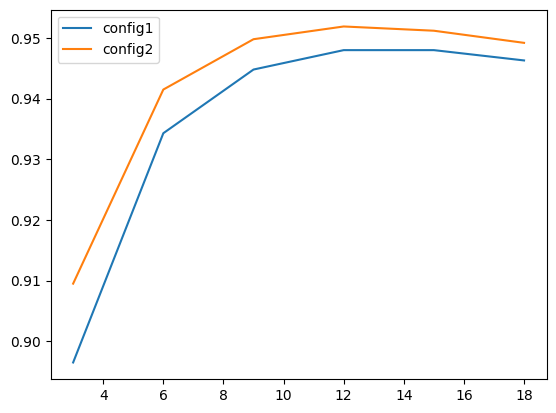

In [7]:
df_all.parametric_plot('efficiency')

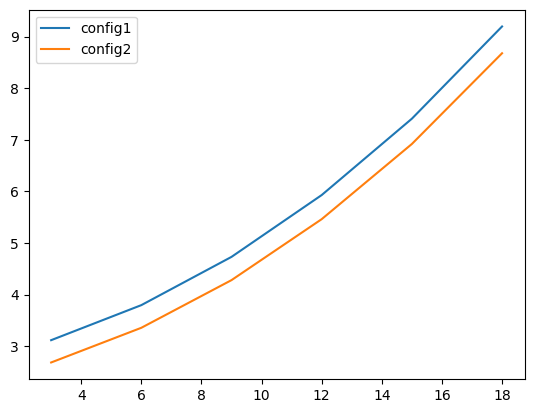

In [8]:
df_all.parametric_plot('total')

### Determine Which Parameters (Columns) are to be displayed in the Comparison

In [ ]:
df_all.columns

In [ ]:
input_config_params = list(input_config[1].keys())
#column_strings = 
lsfet = [param for param in df_all.columns if 'ls ' in param]
hsfet = [param for param in df_all.columns if 'hs ' in param]
lout = [param for param in df_all.columns if 'lout' in param]

xtra_columns = lsfet #+ ['ls fet'] + lout #hsfet# + lsfet
concise_column_list = ['config'] + input_config_params + xtra_columns +['total','efficiency']

### Result

In [ ]:
df_all.filter(concise_column_list).sort_values(by="total") #"ls fet")

In [ ]:
df_all.to_csv(r'sim_results\165W_28Vin_9Vout_multiple_ls_FETs_051325.csv')

In [ ]:
df = pd.DataFrame.from_dict(b_loss.p_summary| b_loss.p_totals,orient='index',columns=[b_loss.idc])
df.T